<a href="https://colab.research.google.com/github/ezazulhaq/ml_practise/blob/master/Text_to_Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text to Image Generation using Stable Diffusion and Diffusers

In [3]:
! pip install diffusers transformers accelerate

In [5]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [9]:
# Check version of any library
! pip show torch

Name: torch
Version: 2.5.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [10]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True).to(device)

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [12]:
prompt1 = """
  photorealistic, visionary portrait of a dignified older man with weather-worn features,
  digitally enhanced, high contrast, chiaroscuro lighting technique, intimate, close-up,
  detailed, steady gaze, rendered in sepia tones, evoking rembrandt, timeless, expressive,
  highly detailed, sharp focus, high resolution
"""

  0%|          | 0/50 [00:00<?, ?it/s]

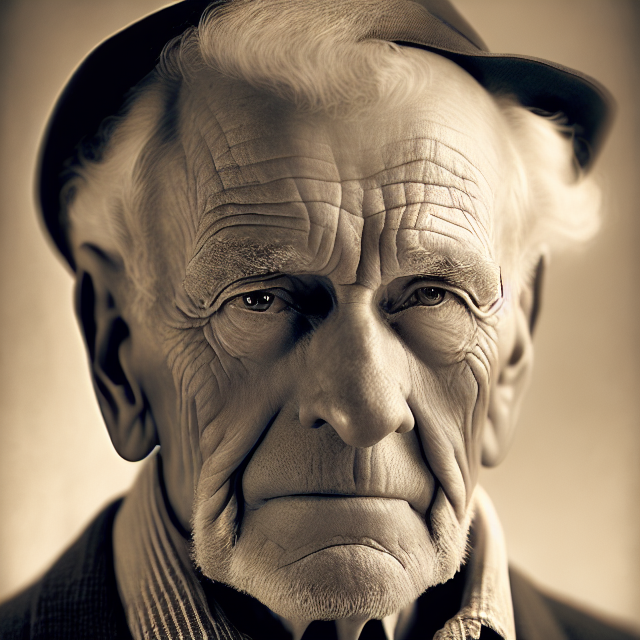

In [17]:
image1 = pipe(prompt1).images[0]
image1

[PROMPT]:  
  photorealistic, visionary portrait of a dignified older man with weather-worn features, 
  digitally enhanced, high contrast, chiaroscuro lighting technique, intimate, close-up, 
  detailed, steady gaze, rendered in sepia tones, evoking rembrandt, timeless, expressive, 
  highly detailed, sharp focus, high resolution



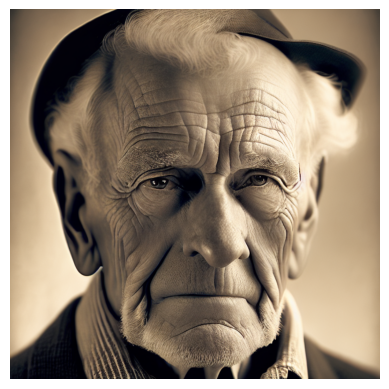

In [18]:
print("[PROMPT]: ", prompt1)
plt.imshow(image1)
plt.axis('off')
plt.show()

## Working with Stable Diffusion Parameters

*  Negative Prompting
*  num_inference_steps
*  height
*  width
*  num_images_per_prompt



In [19]:
def generate_image(pipe, prompt, param):
  image = pipe(prompt, **param).images

  num_images = len(image)
  if num_images > 1:
    fig, axes = plt.subplots(1, num_images)
    for i in range(num_images):
      axes[i].imshow(image[i])
      axes[i].axis('off')
  else:
    fig = plt.figure()
    plt.imshow(image[0])
    plt.axis('off')

  plt.tight_layout()

In [22]:
prompt2 = """
  close up photo of a rabbit, forest in spring, haze, halation, bloom,
  dramatic atmosphere, centred, rule of thirds, 200mm 1.4f macro shot
"""

params={}

  0%|          | 0/50 [00:00<?, ?it/s]

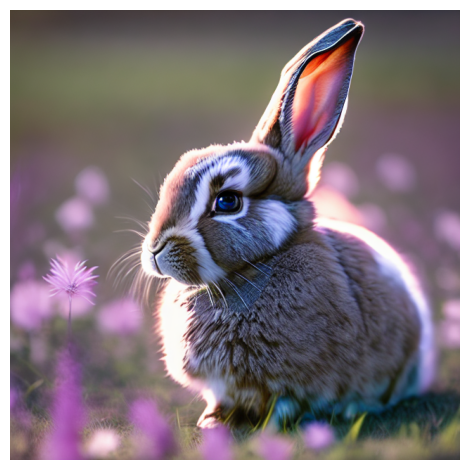

In [23]:
generate_image(pipe, prompt2, params)

  0%|          | 0/100 [00:00<?, ?it/s]

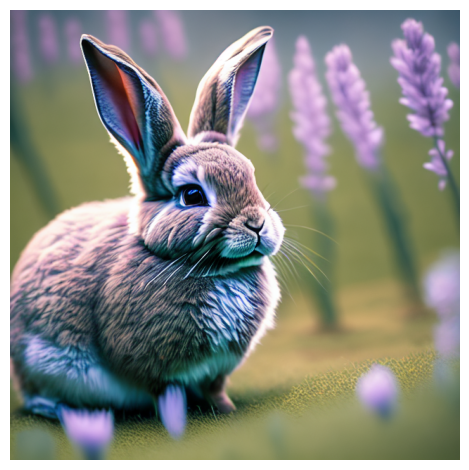

In [24]:
# num_inference_step
params['num_inference_steps'] = 100

generate_image(pipe, prompt2, params)

  0%|          | 0/100 [00:00<?, ?it/s]

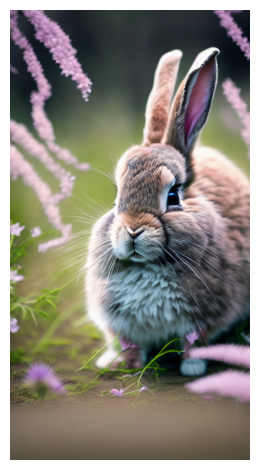

In [25]:
# height width
params['num_inference_steps'] = 100
params['height'] = int(1.5*640)
params['width'] = 512

generate_image(pipe, prompt2, params)

  0%|          | 0/100 [00:00<?, ?it/s]

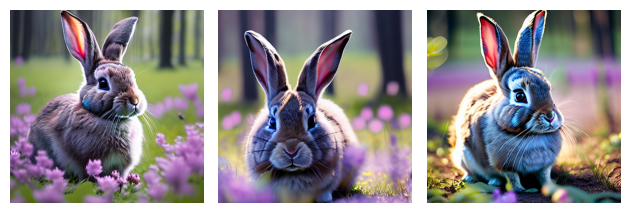

In [26]:
# num_images_per_prompt
params['num_inference_steps'] = 100
params['height'] = 512
params['width'] = 512
params['num_images_per_prompt'] = 3

generate_image(pipe, prompt2, params)

  0%|          | 0/100 [00:00<?, ?it/s]

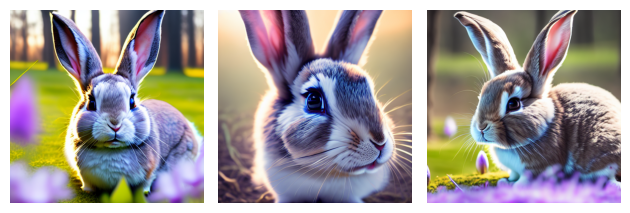

In [29]:
# negative_prompt
params['num_inference_steps'] = 100
params['num_images_per_prompt'] = 3
params['negative_prompt'] = 'ugly, distroied and low quality'

generate_image(pipe, prompt2, params)